In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
advertising = pd.read_csv('Advertising1.csv',usecols=[1,2,3,4])
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [18]:
# advertising.head()
# advertising.tail()
# advertising.shape
# advertising.info()
# advertising.isnull().sum()
# advertising.describe()
# (advertising==0).sum(axis=0)
# advertising.Sales.value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

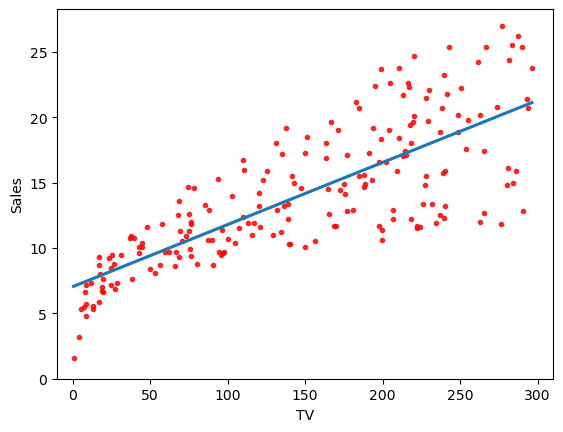

In [56]:
sns.regplot(x=advertising.TV,y=advertising.Sales,order=1,ci=None,scatter_kws={'color':'r','s':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

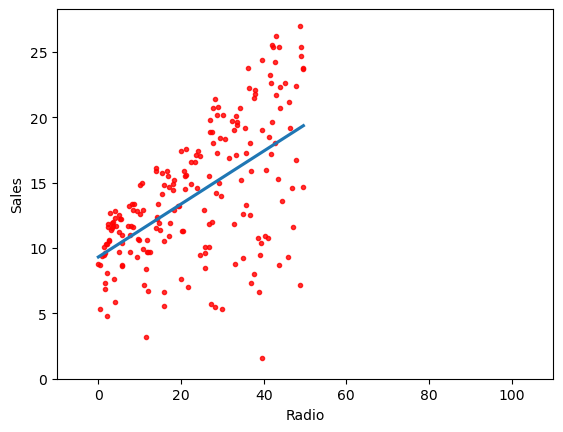

In [58]:
sns.regplot(x=advertising.Radio,y=advertising.Sales,order=1,ci=None,scatter_kws={'color':'r','s':9})
plt.xlim(-10,110)
plt.ylim(bottom=0)
plt.show()

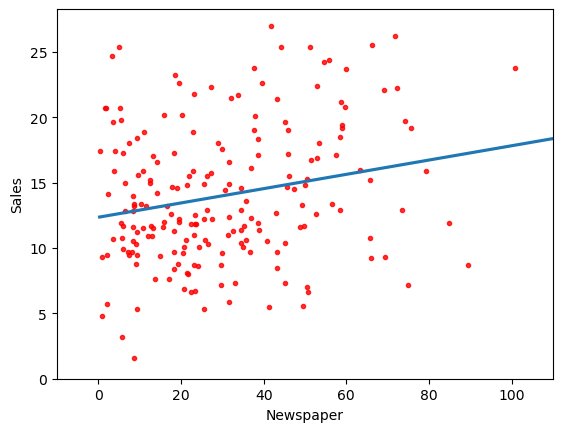

In [60]:
sns.regplot(x=advertising.Newspaper,y=advertising.Sales,order=1,ci=None,scatter_kws={'color':'r','s':9})
plt.xlim(-10,110)
plt.ylim(bottom=0)
plt.show()

In [67]:
import sklearn.linear_model as skl_lm

regr = skl_lm.LinearRegression()
x= advertising.TV.values.reshape(-1,1)
y= advertising.Sales
print(regr.fit(x,y))
print(regr.intercept_)
print(regr.coef_)

LinearRegression()
7.032593549127693
[0.04753664]


In [69]:
min_rss=np.sum((regr.intercept_+regr.coef_*x - y.values.reshape(-1,1))**2)
print(min_rss)
mse=min_rss/len(y)
print(mse)

2102.5305831313512
10.512652915656757


In [70]:
from sklearn.metrics import mean_squared_error,r2_score

Sales_pred = regr.predict(x)
print(r2_score(y,Sales_pred))
print(mean_squared_error(y,Sales_pred))

0.611875050850071
10.512652915656757


In [76]:
import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV',advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        10:59:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
print(est.params,'\n')
print(((advertising.Sales-(est.params[0]+est.params[1]*advertising.TV))**2).sum())

Intercept    7.032594
TV           0.047537
dtype: float64 

2102.5305831313512


In [87]:
est=smf.ols('Sales ~ Radio',advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [90]:
est=smf.ols('Sales ~ Newspaper',advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


In [91]:
est=smf.ols('Sales ~ TV + Radio + Newspaper',advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
